<a href="https://colab.research.google.com/github/YunhuiDong/olist-delivery-satisfaction-team18/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

repo_url = "https://github.com/YunhuiDong/olist-delivery-satisfaction-team18.git"
repo_name = "olist-delivery-satisfaction-team18"

if not os.path.exists(repo_name):
    !git clone {repo_url}
else:
    print(f"✅ Repo '{repo_name}' already exists.")
%cd {repo_name}
!git pull

✅ Repo 'olist-delivery-satisfaction-team18' already exists.
/content/olist-delivery-satisfaction-team18
Already up to date.


In [2]:
# import commom libraries used for EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [3]:
# @title
# load datasets
customer = pd.read_csv('Original Data/olist_customers_dataset.csv')
seller = pd.read_csv('Original Data/olist_sellers_dataset.csv')
geo = pd.read_csv('Original Data/olist_geolocation_dataset.csv')
order = pd.read_csv('Original Data/olist_orders_dataset.csv')
order_items = pd.read_csv('Original Data/olist_order_items_dataset.csv')
order_payments = pd.read_csv('Original Data/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('Original Data/olist_order_reviews_dataset.csv')
products = pd.read_csv('Original Data/olist_products_dataset.csv')
product_category = pd.read_csv('Original Data/product_category_name_translation.csv')

In [4]:
# @title
# General information of those dataset
def summarize_dataset(df, name):
    print(f"\n === {name} Dataset Summary ===")
    print(f"Shape: {df.shape}")
    print("\nMissing Values (%):")
    print(round(df.isnull().sum() / len(df) * 100, 2))
    print("\nDuplicate Rows:")
    print(df.duplicated().sum())
    print("\nData Types:")
    print(df.dtypes)
    print("\nSample Rows:")
    display(df.head())

# Summarize each dataset
datasets = {
    "Customer": customer,
    "Seller": seller,
    "Geolocation": geo,
    "Order": order,
    "Order Items": order_items,
    "Order Payments": order_payments,
    "Order Reviews": order_reviews,
    "Products": products,
    "Product Category": product_category
}

for name, df in datasets.items():
    summarize_dataset(df, name)


 === Customer Dataset Summary ===
Shape: (99441, 5)

Missing Values (%):
customer_id                 0.0
customer_unique_id          0.0
customer_zip_code_prefix    0.0
customer_city               0.0
customer_state              0.0
dtype: float64

Duplicate Rows:
0

Data Types:
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

Sample Rows:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP



 === Seller Dataset Summary ===
Shape: (3095, 4)

Missing Values (%):
seller_id                 0.0
seller_zip_code_prefix    0.0
seller_city               0.0
seller_state              0.0
dtype: float64

Duplicate Rows:
0

Data Types:
seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

Sample Rows:


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP



 === Geolocation Dataset Summary ===
Shape: (1000163, 5)

Missing Values (%):
geolocation_zip_code_prefix    0.0
geolocation_lat                0.0
geolocation_lng                0.0
geolocation_city               0.0
geolocation_state              0.0
dtype: float64

Duplicate Rows:
261831

Data Types:
geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

Sample Rows:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP



 === Order Dataset Summary ===
Shape: (99441, 8)

Missing Values (%):
order_id                         0.00
customer_id                      0.00
order_status                     0.00
order_purchase_timestamp         0.00
order_approved_at                0.16
order_delivered_carrier_date     1.79
order_delivered_customer_date    2.98
order_estimated_delivery_date    0.00
dtype: float64

Duplicate Rows:
0

Data Types:
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

Sample Rows:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00



 === Order Items Dataset Summary ===
Shape: (112650, 7)

Missing Values (%):
order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64

Duplicate Rows:
0

Data Types:
order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

Sample Rows:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14



 === Order Payments Dataset Summary ===
Shape: (103886, 5)

Missing Values (%):
order_id                0.0
payment_sequential      0.0
payment_type            0.0
payment_installments    0.0
payment_value           0.0
dtype: float64

Duplicate Rows:
0

Data Types:
order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

Sample Rows:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45



 === Order Reviews Dataset Summary ===
Shape: (99224, 7)

Missing Values (%):
review_id                   0.00
order_id                    0.00
review_score                0.00
review_comment_title       88.34
review_comment_message     58.70
review_creation_date        0.00
review_answer_timestamp     0.00
dtype: float64

Duplicate Rows:
0

Data Types:
review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

Sample Rows:


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53



 === Products Dataset Summary ===
Shape: (32951, 9)

Missing Values (%):
product_id                    0.00
product_category_name         1.85
product_name_lenght           1.85
product_description_lenght    1.85
product_photos_qty            1.85
product_weight_g              0.01
product_length_cm             0.01
product_height_cm             0.01
product_width_cm              0.01
dtype: float64

Duplicate Rows:
0

Data Types:
product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

Sample Rows:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0



 === Product Category Dataset Summary ===
Shape: (71, 2)

Missing Values (%):
product_category_name            0.0
product_category_name_english    0.0
dtype: float64

Duplicate Rows:
0

Data Types:
product_category_name            object
product_category_name_english    object
dtype: object

Sample Rows:


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [5]:
# @title
# Standardization: Time Converter
order['order_purchase_timestamp'] = pd.to_datetime(order['order_purchase_timestamp'])
order['order_approved_at'] = pd.to_datetime(order['order_approved_at'])
order['order_delivered_carrier_date'] = pd.to_datetime(order['order_delivered_carrier_date'])
order['order_delivered_customer_date'] = pd.to_datetime(order['order_delivered_customer_date'])
order['order_estimated_delivery_date'] = pd.to_datetime(order['order_estimated_delivery_date'])

# Standardization: Reindexing
order = order[order['order_status'] == 'delivered'].reset_index(drop=True)

# Missing Values: fill with values
order_reviews['review_comment_title'] = order_reviews['review_comment_title'].fillna('No Title')
order_reviews['review_comment_message'] = order_reviews['review_comment_message'].fillna('No Comment')
order_reviews['review_creation_date'] = pd.to_datetime(order_reviews['review_creation_date'])
order_reviews['review_answer_timestamp'] = pd.to_datetime(order_reviews['review_answer_timestamp'])



In [6]:
# EDA
# Distribution
  # customer location (state)
  # seller location
# Geographic distribution by state (sellers & customer)
# deeper: Customer vs Seller concentration
# Geographic spread (using lat/lng)

## Customer

In [7]:
customer['customer_unique_id'].nunique(), customer['customer_id'].nunique()

(96096, 99441)

In [8]:
#EDA: Distribution of customers by state

print(f'Unique number of customer state: ', customer.customer_state.nunique())
print(f'Unique number of customer cities: ', customer.customer_city.nunique())

Unique number of customer state:  27
Unique number of customer cities:  4119


Text(0.5, 1.0, 'Customer Distribution by State')

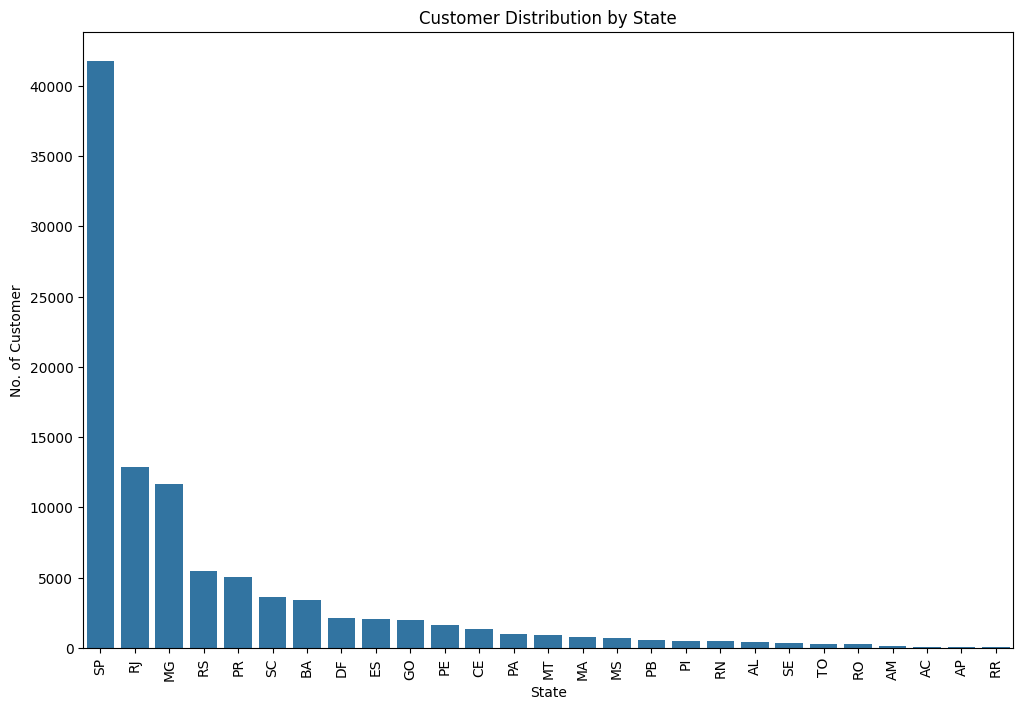

In [9]:
plt.figure(figsize = (12,8))
sns.countplot(data=customer, x='customer_state', order=customer['customer_state'].value_counts().index)
plt.xlabel('State')
plt.ylabel('No. of Customer')
plt.xticks(rotation = 90)
plt.title('Customer Distribution by State')

In [10]:
customer_state_pct = (customer['customer_state'].value_counts(normalize=True) * 100).round(2)
print(customer_state_pct.head(5))

customer_state
SP    41.98
RJ    12.92
MG    11.70
RS     5.50
PR     5.07
Name: proportion, dtype: float64


## Seller

In [11]:
#EDA: Distribution of sellers by state

print(f'Unique number of sellers state: ', customer.customer_state.nunique())
print(f'Unique number of sellers cities: ', customer.customer_city.nunique())

Unique number of sellers state:  27
Unique number of sellers cities:  4119


Text(0.5, 1.0, 'Sellers Distribution by State')

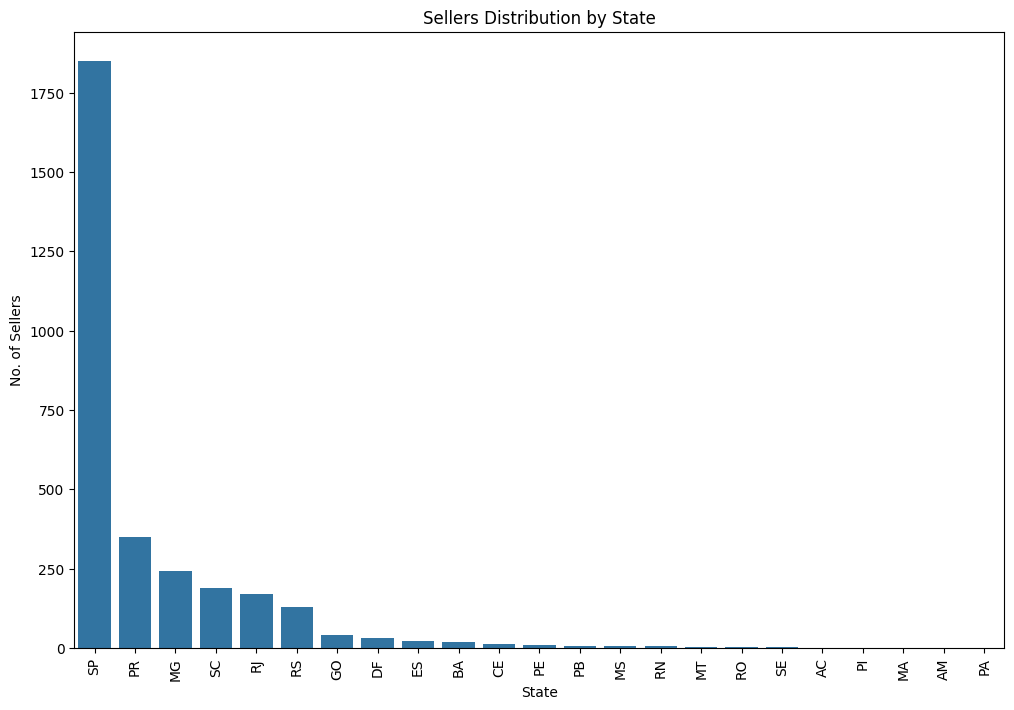

In [12]:
plt.figure(figsize = (12,8))
sns.countplot(data=seller, x='seller_state', order=seller['seller_state'].value_counts().index)
plt.xlabel('State')
plt.ylabel('No. of Sellers')
plt.xticks(rotation = 90)
plt.title('Sellers Distribution by State')

In [13]:
seller_state_pct = (seller['seller_state'].value_counts(normalize=True) * 100).round(2)
print(seller_state_pct.head(5))

seller_state
SP    59.74
PR    11.28
MG     7.88
SC     6.14
RJ     5.53
Name: proportion, dtype: float64


The plot and analysis shows that most customer and sellers are located in **São Paulo (SP)**, leading with ***41.98%*** of customer and ***59.74%*** of seller base. The secondary market concentrated in PR, RJ, and MG etc. Therefore, SP should be the primary focuse for futher analysis and business strategy.

## Geographic

In [14]:
check_multi_state = geo.groupby('geolocation_zip_code_prefix')['geolocation_state'].nunique().value_counts()
print(check_multi_state)

check_multi_city = geo.groupby('geolocation_zip_code_prefix')['geolocation_city'].nunique().value_counts()
print(check_multi_city)

geolocation_state
1    19007
2        8
Name: count, dtype: int64
geolocation_city
1    10459
2     8265
3      255
4       27
5        9
Name: count, dtype: int64


When examining the geolocation dataframe, we observe that each column represents a different level of geographic granularity. The sample rows above highlight a key issue — the same city and state can appear with multiple latitude, longitude, and ZIP code prefix values, reflecting Olist’s use of truncated (five-digit) postal codes.

For subsequent modeling and visualization, it is crucial to select an appropriate spatial resolution. Given that São Paulo (SP) dominates both the customer and seller base, relying solely on the state level would be overly coarse. Meanwhile, city-level aggregation, though intuitive, may overlook intra-city variation.

However, working at the ZIP-code-prefix level presents its own challenge: a single prefix can correspond to two or more neighboring cities due to the shortened format of postal codes. This overlap is not rare, but rather a structural characteristic of the dataset. Despite this ambiguity, the prefix level still provides the most geographically consistent and fine-grained approximation available, as latitude and longitude can be averaged to represent each region’s central location.

In summary, we will clean the geolocation dataframe by grouping on the zip_code_prefix column, taking the mean latitude and longitude for each prefix, and assigning the most frequently occurring city as its representative label — acknowledging that this approach balances precision and practicality.

In [15]:
# Clean and aggregate geolocation data by ZIP code prefix
# Reasoning: city/state-level is too coarse, while prefix-level provides finer, more stable coordinates
# Each prefix may represent multiple nearby cities, but averaging lat/lng captures a consistent regional center

geo_clean = (geo.groupby('geolocation_zip_code_prefix', as_index = False).agg(
    {
        'geolocation_lat': 'mean',
        'geolocation_lng':'mean',
        'geolocation_city': lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0],
        'geolocation_state': lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0],
    })
)

## Orders

In [16]:
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [17]:
# add new features
order['delivery_days'] = (order['order_delivered_customer_date'] - order['order_purchase_timestamp']).dt.days
order['delay_days'] = (order['order_delivered_customer_date'] - order['order_estimated_delivery_date']).dt.days
order['is_late'] = (order['delay_days'] > 0).astype(int)

# remove orders that not yet delivered
order_clean = order[order['order_status'] == 'delivered'].dropna(subset=['order_delivered_customer_date'])


Text(0.5, 1.05, 'Delivery Time Distribution by Delivery Status')

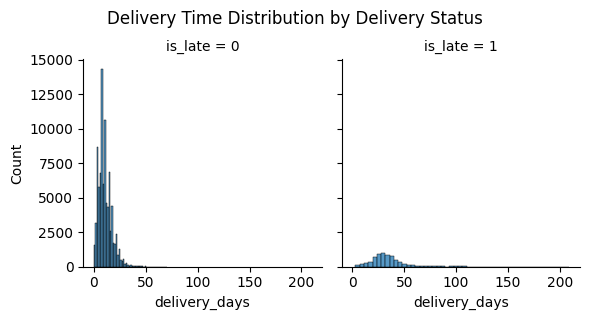

In [18]:
g = sns.FacetGrid(data = order_clean, col = 'is_late')
g.map(sns.histplot, 'delivery_days', bins = 50)
plt.suptitle('Delivery Time Distribution by Delivery Status', fontsize = 12, y = 1.05)

In [19]:
late_count = order_clean['is_late'].value_counts()

Text(0.5, 1.0, 'Proportion of Late Deliveries')

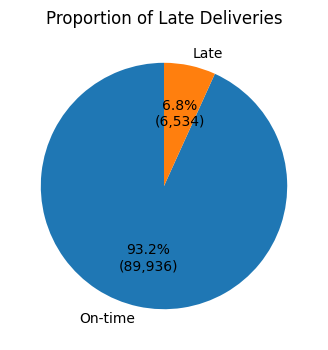

In [20]:
plt.figure(figsize=(4,4))
plt.pie(order_clean['is_late'].value_counts(),
        autopct=lambda pct: f"{pct:.1f}%\n({int(round(pct * sum(late_count)/100.0)):,})",
        startangle = 90,
        labels=['On-time','Late'])
plt.title('Proportion of Late Deliveries')

## Order_items

In [21]:
order_items.nunique()

,0
order_id,98666
order_item_id,21
product_id,32951
seller_id,3095
shipping_limit_date,93318
price,5968
freight_value,6999


In [22]:
dup_check = (order_items.groupby('order_id')[['price','freight_value']].nunique()
            .rename(columns={'price':'unique_price','freight_value':'unique_freight'}))
dup_check.head()

,unique_price,unique_freight
order_id,,
00010242fe8c5a6d1ba2dd792cb16214,1,1
00018f77f2f0320c557190d7a144bdd3,1,1
000229ec398224ef6ca0657da4fc703e,1,1
00024acbcdf0a6daa1e931b038114c75,1,1
00042b26cf59d7ce69dfabb4e55b4fd9,1,1


Clearly, we see duplicate values appears in this dataset. So before further processing, we will take out all duplication values.

In [23]:
order_items_clean = order_items.drop_duplicates(subset=['order_id','seller_id','price','freight_value'])

order_items_clean = (
    order_items_clean
    .drop_duplicates(subset='order_id', keep='first')
    [['order_id','seller_id','price','freight_value']])

Text(0.5, 1.0, 'Freight vs Price')

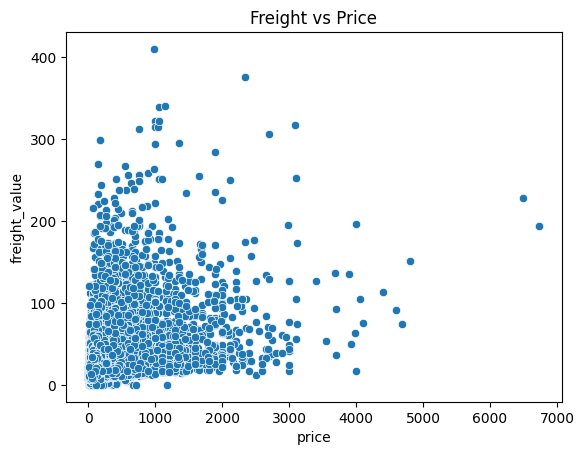

In [24]:
sns.scatterplot(data = order_items, x = 'price', y = 'freight_value')
plt.title('Freight vs Price')

Majority are have lower price with lower freight value, but clearly with outliers with extreme high price and also extreme high freight value, that might take into consideration.

## Order Payment


In [25]:
order_payments['payment_type'].value_counts(normalize=True)*100

,proportion
payment_type,
credit_card,73.922376
boleto,19.043952
voucher,5.558978
debit_card,1.471806
not_defined,0.002888


A "boleto" most commonly refers to Boleto Bancário, a popular payment method in Brazil that uses a voucher with a barcode for transactions (Google)

In [26]:
dupes_count = order_payments['order_id'].duplicated().sum()
print(f"Number of duplicated order_id: {dupes_count}")

Number of duplicated order_id: 4446


In [27]:
order_payments_clean = order_payments.groupby('order_id', as_index = False).agg(
    payment_value = ('payment_value', 'sum'),
    payment_type = ('payment_type', 'first')
)


In [28]:
order_payments_clean.nunique()

,0
order_id,99440
payment_value,27979
payment_type,5


## Order Review


<Axes: xlabel='review_score', ylabel='count'>

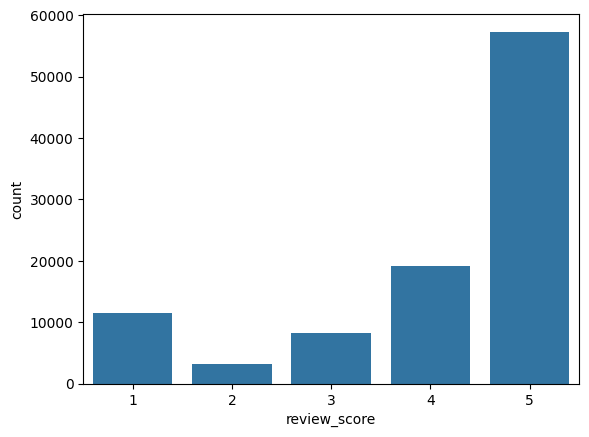

In [29]:
sns.countplot(x = 'review_score', data = order_reviews)

## Keep & Merge

In [30]:
# Already created new dataframe order_clean and geo_clean

customer = customer.drop(columns=['customer_state', 'customer_unique_id', 'customer_city'])
seller = seller.drop(columns=['seller_state', 'seller_city'])
order_reviews = order_reviews.drop(columns = ['review_comment_title','review_comment_message',
                                              'review_creation_date','review_answer_timestamp'])

In [31]:
# Merge data together
merged = order_clean.merge(customer, on = 'customer_id', how = 'left')
print(f"Customer merged: {merged['customer_zip_code_prefix'].notna().mean():.2%}")

Customer merged: 100.00%


In [32]:
merged = merged.merge(order_items_clean, on='order_id', how='left')
print(f"Order items merged: {merged['price'].notna().mean():.2%}")

Order items merged: 100.00%


In [33]:
merged = merged.merge(seller, on='seller_id', how='left')
print(f"Seller merged: {merged['seller_zip_code_prefix'].notna().mean():.2%}")

Seller merged: 100.00%


In [34]:
merged = merged.merge(order_payments_clean, on='order_id', how='left')
print(f"Order Payment merged: {merged['payment_value'].notna().mean():.2%}")

Seller merged: 100.00%


In [35]:
merged = merged.merge(order_reviews, on='order_id', how='left')
print(f"Review merged: {merged['review_score'].notna().mean():.2%}")

Review merged: 99.33%


In [37]:
delivery_df = (merged.merge(geo_clean.add_prefix('customer_'),
                       left_on='customer_zip_code_prefix', right_on='customer_geolocation_zip_code_prefix', how='left')
          .merge(geo_clean.add_prefix('seller_'),
                 left_on='seller_zip_code_prefix', right_on='seller_geolocation_zip_code_prefix', how='left'))

In [38]:
print(f"Customer geo merge rate: {delivery_df['customer_geolocation_lat'].notna().mean():.2%}")
print(f"Seller geo merge rate: {delivery_df['seller_geolocation_lat'].notna().mean():.2%}")

Customer geo merge rate: 99.72%
Seller geo merge rate: 99.78%


In [40]:
delivery_df.shape

(96999, 30)

## Geo Map

In [43]:
# Map for customer and seller distribution （size by size）

In [ ]:
# Distance? how to do

## Correlation Finding

In [ ]:
# correltion map / heatmap with annotation - islate correspond with other factors
# review vs is_late - box or violin map
# payment vs is_late - heatmap
# correlation map - all numerical features